# EDA

Here we perform exploratory data analysis and sanity checks.

Here we clean up the merged file and quantify missingness in the data.

**Sections**
- [Setup](#Setup)
- [Load data](#Load-data)
- [Plotting](#Plotting)
- [Sense checks](###Sense-checks)

## Setup

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data

In [ ]:
# load the clean datasets

df = pd.read_csv("clean_data.csv")
df.sample()
df.columns

Index(['census_tract', 'StCoFIPS2019', 'StAbbr', 'walkability_index',
       'Pop2018', 'HU2018', 'HH2018', 'employment_mix',
       'employment_residential_mix', 'intersection_density',
       'transit_accessibility', 'employment_mix_ranked',
       'employment_residential_mix_ranked', 'intersection_density_ranked',
       'transit_accessibility_ranked', 'median_income', 'percent_unemployed',
       'percent_below_poverty', 'percent_bachelor_and_higher',
       'percent_over_65', 'percent_commute_car', 'percent_commute_transit',
       'percent_white', 'percent_black', 'percent_native_american',
       'percent_asian', 'percent_pacific_islander', 'statedesc', 'countyname',
       'total_population', 'arthritis_crudeprev', 'arthritis_crude95ci',
       'high_blood_pressure_prevalence', 'high_blood_pressure_95ci',
       'cancer_prevalence', 'cancer_95ci', 'current_asthma_prevalence',
       'current_asthma_95ci', 'coronary_heart_disease_prevalence',
       'coronary_heart_disease_95ci'

## Plotting

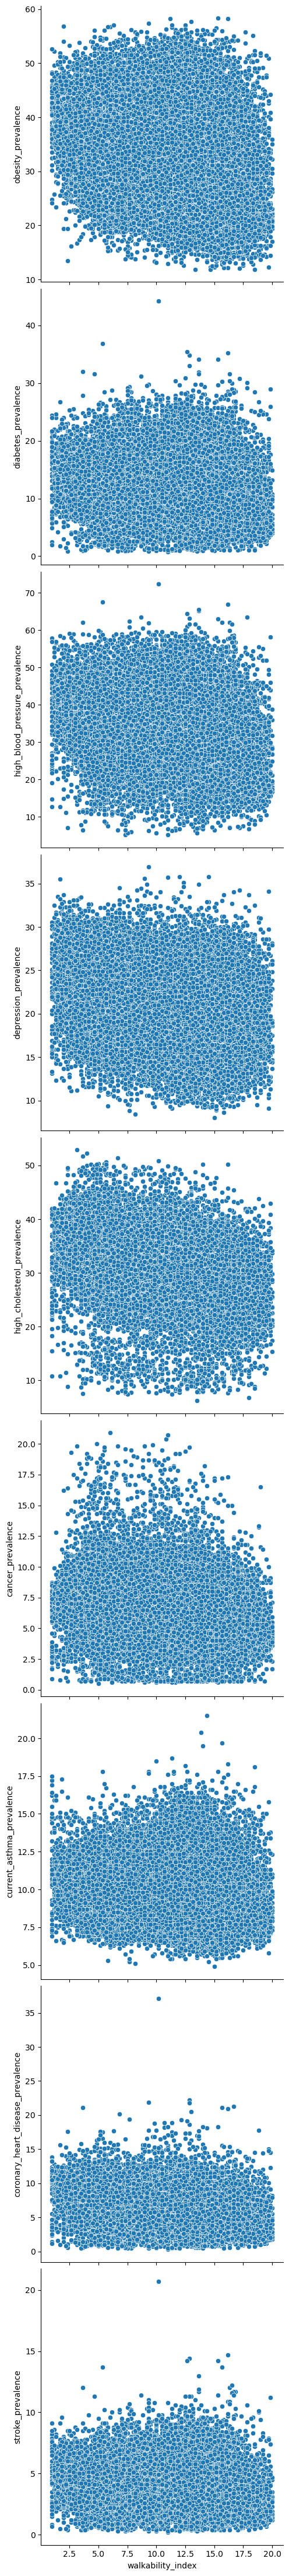

In [6]:
import seaborn as sns

# We extract the health outcome columns
health_outcomes_columns = [
    'obesity_prevalence',
    'diabetes_prevalence',
    'high_blood_pressure_prevalence',
    'depression_prevalence',
    'high_cholesterol_prevalence',
    'cancer_prevalence',
    'current_asthma_prevalence',
    'coronary_heart_disease_prevalence',
    'stroke_prevalence'
]


# We make scatter plot of each health oucome against walkability index
sns.pairplot(
    df,
    y_vars=health_outcomes_columns,
    x_vars=["walkability_index"],
    height=5,
    diag_kind=None,
)

plt.show()

## Sense checks

### Obesity vs Walkability

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import mean_squared_error

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

X = df_train[["walkability_index"]]
y = df_train["obesity_prevalence"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=6.5222, std=0.0416
Dummy  RMSE (CV): mean=6.8200, std=0.0338


Seems like we won't be able to model obesity using just walkability.

### Depression vs walkability

In [8]:
X = df_train[["walkability_index"]]
y = df_train["depression_prevalence"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=3.4474, std=0.0116
Dummy  RMSE (CV): mean=3.6505, std=0.0164


Seems like we won't be able to model depression using just walkability.

### Cholesterol vs walkability

In [9]:
X = df_train[["walkability_index"]]
y = df_train["high_cholesterol_prevalence"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=4.3553, std=0.0414
Dummy  RMSE (CV): mean=4.8060, std=0.0449


Seems like we won't be able to model cholesterol using just walkability.

### Obesity vs cholesterol

In [10]:
X = df_train[["high_cholesterol_prevalence"]]
y = df_train["obesity_prevalence"]

linear = LinearRegression()
dummy  = DummyRegressor(strategy="mean")

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_lin, rmse_dummy = [], []

for tr_idx, va_idx in kf.split(X):
    Xtr, Xva = X.iloc[tr_idx], X.iloc[va_idx]
    ytr, yva = y.iloc[tr_idx], y.iloc[va_idx]

    linear.fit(Xtr, ytr)
    yhat = linear.predict(Xva)
    rmse_lin.append(np.sqrt(mean_squared_error(yva, yhat)))

    dummy.fit(Xtr, ytr)
    yhat_d = dummy.predict(Xva)
    rmse_dummy.append(np.sqrt(mean_squared_error(yva, yhat_d)))

print(f"Linear RMSE (CV): mean={np.mean(rmse_lin):.4f}, std={np.std(rmse_lin):.4f}")
print(f"Dummy  RMSE (CV): mean={np.mean(rmse_dummy):.4f}, std={np.std(rmse_dummy):.4f}")

Linear RMSE (CV): mean=6.4749, std=0.0243
Dummy  RMSE (CV): mean=6.8200, std=0.0338


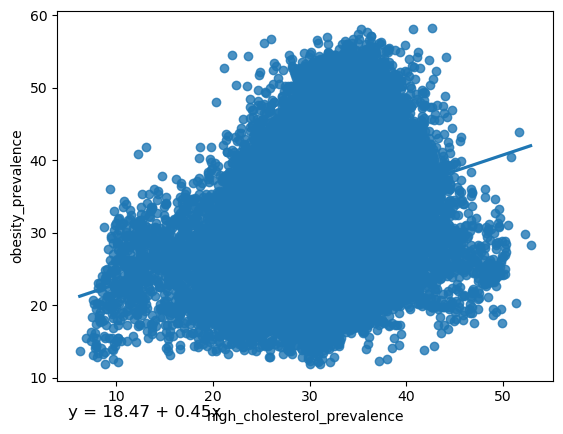

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     obesity_prevalence   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     7590.
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:03:00   Log-Likelihood:            -2.3063e+05
No. Observations:               70158   AIC:                         4.613e+05
Df Residuals:                   70156   BIC:                         4.613e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      18.4681      0.164    112.270      0.000      18.146      18.790
high_cholesterol_prevalence     0.4450      0.005     87.121      0.000       0.435       0.455
==============================================================================
Omnibus:                      700.387   Durbin-Watson:                   0.429
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              785.285
Skew:                           0.204   Prob(JB):                    3.00e-171
Kurtosis:                       3.321   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['high_cholesterol_prevalence'], df['obesity_prevalence'])

sns.regplot(x = "high_cholesterol_prevalence", y = 'obesity_prevalence', data = df)
plt.text(5, 4.5, f'y = {intercept:.2f} + {slope:.2f}x', fontsize=12)
plt.show()
model = smf.ols(formula='obesity_prevalence ~ high_cholesterol_prevalence', data=df).fit()
model.summary()

### Stroke vs obesity

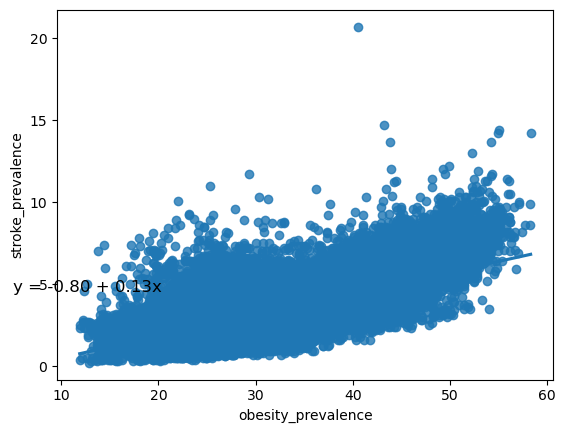

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      stroke_prevalence   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                 6.467e+04
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:03:44   Log-Likelihood:                -94306.
No. Observations:               70158   AIC:                         1.886e+05
Df Residuals:                   70156   BIC:                         1.886e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8009      0.017    -46.749      0.000      -0.835      -0.767
obesity_prevalence     0.1307      0.001    254.311      0.000       0.130       0.132
==============================================================================
Omnibus:                    20686.001   Durbin-Watson:                   0.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116664.571
Skew:                           1.305   Prob(JB):                         0.00
Kurtosis:                       8.753   Cond. No.                         163.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['obesity_prevalence'], df['stroke_prevalence'])

sns.regplot(x = "obesity_prevalence", y = 'stroke_prevalence', data = df)
plt.text(5, 4.5, f'y = {intercept:.2f} + {slope:.2f}x', fontsize=12)
plt.show()
model = smf.ols(formula='stroke_prevalence ~ obesity_prevalence', data=df).fit()
model.summary()

### Cancer versus age

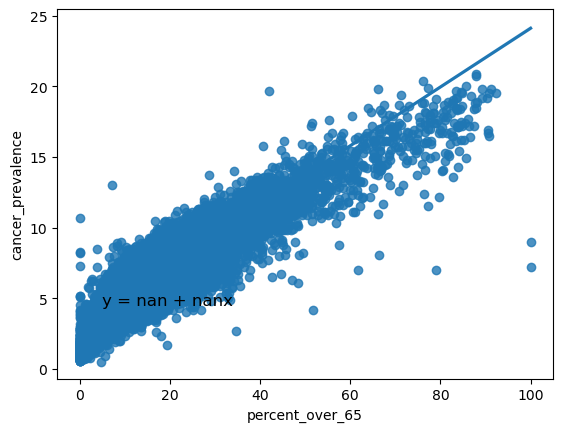

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      cancer_prevalence   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                 2.112e+05
Date:                Wed, 15 Oct 2025   Prob (F-statistic):               0.00
Time:                        10:04:23   Log-Likelihood:                -97192.
No. Observations:               70147   AIC:                         1.944e+05
Df Residuals:                   70145   BIC:                         1.944e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.3243      0.008    401.737      0.000       3.308       3.341
percent_over_65     0.2079      0.000    459.610      0.000       0.207       0.209
==============================================================================
Omnibus:                    12596.276   Durbin-Watson:                   1.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61522.408
Skew:                          -0.793   Prob(JB):                         0.00
Kurtosis:                       7.305   Cond. No.                         41.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['percent_over_65'], df['cancer_prevalence'])

sns.regplot(x = "percent_over_65", y = 'cancer_prevalence', data = df)
plt.text(5, 4.5, f'y = {intercept:.2f} + {slope:.2f}x', fontsize=12)
plt.show()
model = smf.ols(formula='cancer_prevalence ~ percent_over_65', data=df).fit()
model.summary()